# Google Play Store App Analysis

## 1.0 Summary

## 2.0 Background

Mobile apps have become a normal part of everyday and everyone with a smartphone
has used and downloaded mobile apps to their device. Many of these apps on various
marketplace are accompanied by user reviews. This analysis will focus on Android apps on the Google Play Store marketplace. In addition to analyzing apps across various app categories it will also utilize user review to gather qualitative insights about these apps. The dataset used for this analysis was published ot [Kaggle](https://www.kaggle.com/datasets), and can be found here: [Google Play Store Apps](https://www.kaggle.com/datasets/lava18/google-play-store-apps).

## 3.0 Environment Setup

### 3.1 Package Import

In [500]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## 4.0 Data Import

### 4.1 Apps

### 4.1.1 App Description
Dataset which contains the details of the Google Play Store apps and provides 13
feature describing the application.

*All features represent the feature at the time the dataset was created and may have changed since*

* App: Application name
* Category: category of the app
* Rating: overall user rating of the app
* Reviews: number of user reviews
* Size: size of the app
* Installs: number of user downloads of the app
* Type: paid or free
* Price: price of the app
* Content Rating: age group the app is targeted at (Children/Mature 21+/Adult)
* Genres: the app can belong to multiple genres (in addition to the main category)
* Last Updated: date the app wa last updated on the marketplace
* Current Ver: current version of the app available on the marketplace
* Android Ver: minimum required android version


In [501]:
raw_apps = pd.read_csv("datasets/apps.csv")
raw_apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### 4.1.2 User Reviews
Dataset contain 100 reviews for each app, with the most helpful reviews listed first. The text has been pre-process through a sentiment analyzer and tagged with its sentiment score

In [502]:
raw_reviews = pd.read_csv("datasets/user_reviews.csv")
raw_reviews.head()

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


## 5.0 Exploratory Analysis

### 5.1 Duplicate Apps

In [503]:
raw_apps.nunique()

Unnamed: 0        9659
App               9659
Category            33
Rating              39
Reviews           5330
Size               191
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             118
Last Updated      1377
Current Ver       2769
Android Ver         33
dtype: int64

The App column containing the application name all are unique values indicating
that there are no duplicated apps in the dataset. There are 33 unique main
categories an app can belong to. Reviewing the unique values of Installs, which
was expected to be a number, this does not appear to be the case. Looking at the
data it looks like the number of installs have been binned to categorical
grouping (e.g. 10,000+, 50,000+)

### 5.2 Data Types

In [504]:
raw_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


Reviewing the data types of each column it can be seen that Installs is an object type. Prior to analysis this will have to be modified and transformed to an integer data type.

### 5.3 Category Counts

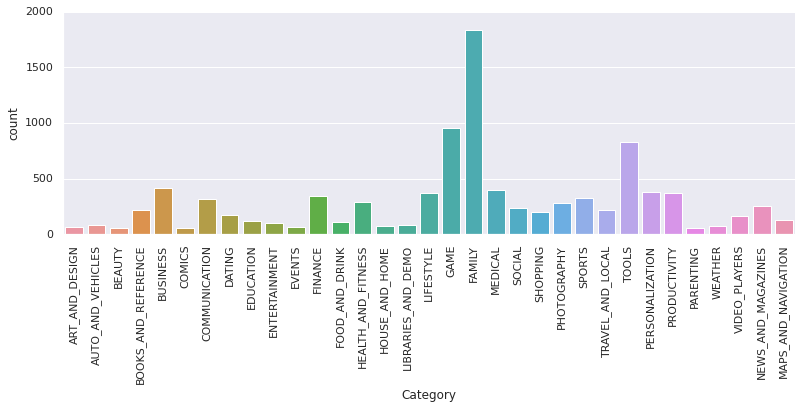

In [505]:
plot = sns.catplot(x='Category', data=raw_apps, kind='count', height=4, aspect=3)
plot.set_xticklabels(rotation='vertical')

The category with the most apps in the dataset is the FAMILY category with 1832 apps, followed by GAME and then TOOLS with 959 and 827, respectively.

### 5.4 Rating Distribution

4.173243045387994

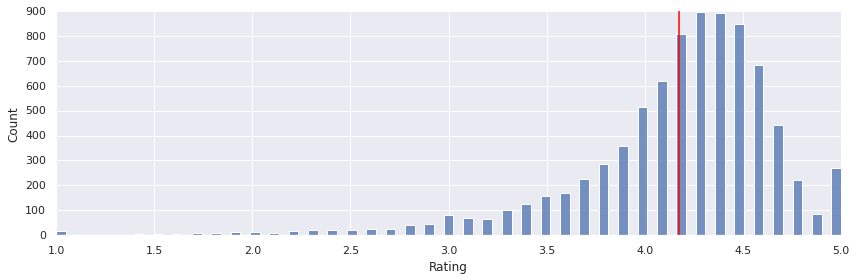

In [506]:
plot = sns.displot(x='Rating', data=raw_apps, height=4, aspect=3)
plt.axvline(x=raw_apps.Rating.mean(), color='red')
raw_apps.Rating.mean()

The average rating across all app categories can be seen to b approximately 4.2. The histogram is skewed to the left which indicates the majority of the apps are highly rated with a few number of lowly rated apps.

### 5.5 Price Counts

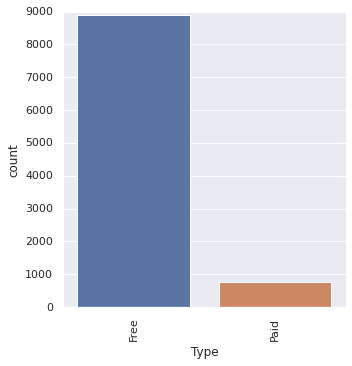

In [507]:
plot = sns.catplot(x='Type', data=raw_apps, kind='count')
plot.set_xticklabels(rotation='vertical')

Of the apps analyzed on the marketplace, Free apps far outnumber paid apps.

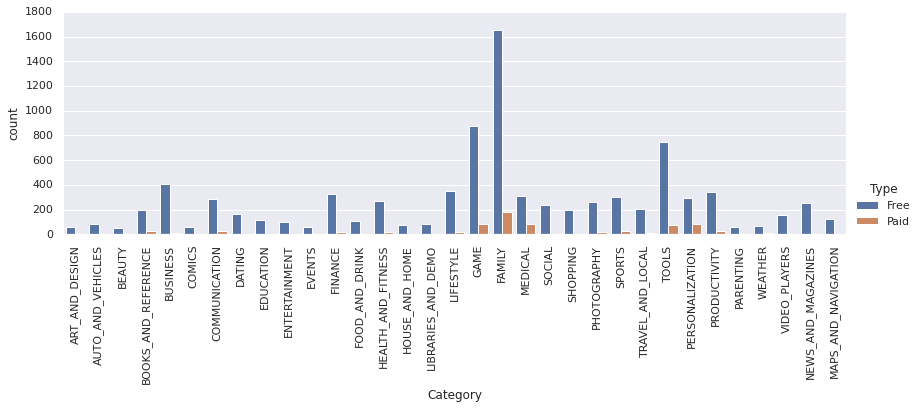

In [508]:
plot = sns.catplot(x='Category', data=raw_apps, kind='count', height=4, aspect=3, hue='Type')
plot.set_xticklabels(rotation='vertical')

The most popular type of app analyzed is Free consisting of 8903 of the 9659 apps in the data, or 92%. The breakdown of Free vs Paid appears to be roughly consistent across all the app categories.

## 6.0 Cleaning Datasets 

### 6.1 Drop Erroneous Column

In [509]:
apps = raw_apps.drop('Unnamed: 0', axis='columns')

### 6.2 Correct Data Types

Both the Installs columns and Price column contain characters `,`, `+`, and '$` that prohibit transforming the column to a numeric data type which will be needed for analysis. These characters must be dropped from the values and then the data type will be updated.

In [510]:
characters = ['+', ',', '$']
columns = ['Installs', 'Price']

# Iterate over each column to be cleaned
for col in columns:
    #Ierate over each character to be replaced
    for char in characters:
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))

    apps[col] = apps[col].astype(float)

apps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 981.1+ KB


## 7.0 Data Analysis

### 7.1 Price, Rating, and Size Analysis

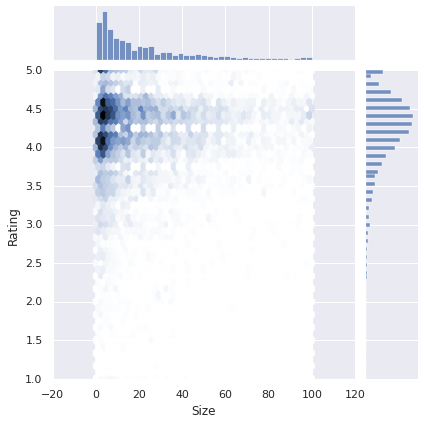

In [511]:
apps_price_size = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]
apps_price_size.shape

plot = sns.jointplot(data=apps_price_size, x='Size', y='Rating', kind='hex')

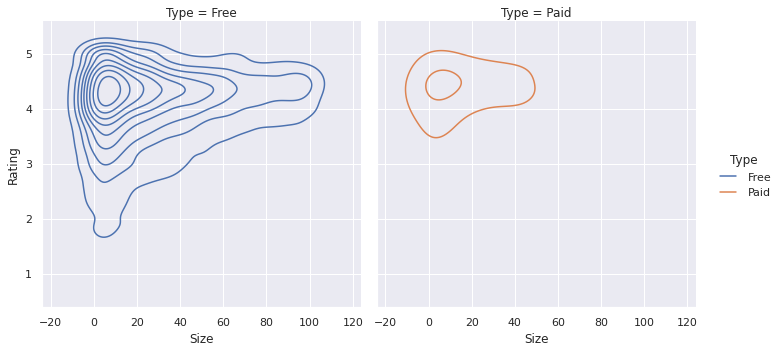

In [512]:
plot = sns.displot(data=apps_price_size, x='Size', y='Rating', kind='kde', col='Type', hue='Type')

From the first plot it can be seen that the size of the app does not appear to have a strong impact on the apps rating. It can be see that most apps are smaller hand have generally a high rating. However there are some exceptions that can be observed of small apps that have low ratings. Also, it can be see that even the larger apps although make up less have typically still have a similar rating to the small apps.

The second plot shows that the trend generally remains true for both Free and Paid apps. The plot shows that the highest density of both app type are small in size and have a high rating.

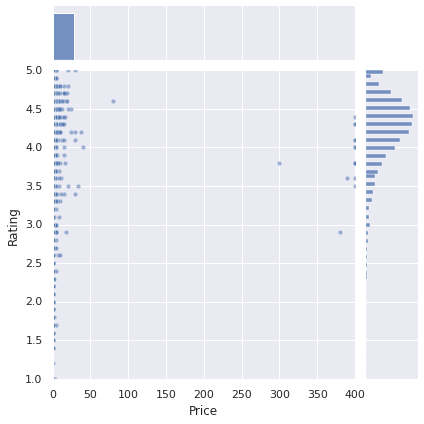

In [513]:
plot = sns.jointplot(data=apps_price_size, x='Price', y='Rating', kind='scatter', alpha=0.5)

It can be observed that Price also does not negatively impact the rating of the app. Most apps on the marketplace are free and have a high rating with few exceptions. Interestingly it can also be see there are a few expensive apps within the dataset which in general have similar ratings to Free apps.

### 7.2 Category and Price Analysis

In [514]:
apps_rating_price= apps[(~apps['Rating'].isnull()) & (~apps['Price'].isnull())]

#### 7.2.1 Explore Expensive Apps

In [515]:
expensive_apps = apps_rating_price[apps_rating_price['Price'] >= 200][['App', 'Price']]
expensive_apps

,App,Price
3327,most expensive app (H),399.99
3465,💎 I'm rich,399.99
3469,I'm Rich - Trump Edition,400.00
4396,I am rich,399.99
4398,I am Rich Plus,399.99
4399,I am rich VIP,299.99
4400,I Am Rich Premium,399.99
4401,I am extremely Rich,379.99
4402,I am Rich!,399.99
4403,I am rich(premium),399.99


Prior analysis identified a small subset of apps that were much more expensive than all other apps on the marketplace. Further examination of these have identified all of the as being part of an "I am Rich" app collection. This collection appears to only serve the purpose of downloading it to show other that you have it, and will be dropped from further price analysis.

In [516]:
apps_rating_price = apps_rating_price[apps_rating_price['Price'] < 200]
apps_rating_price.sort_values('Price', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1755,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32.0,1000.0,Paid,79.99,Everyone,Medical,"June 18, 2018",19,4.0.3 and up
1896,LTC AS Legal,MEDICAL,4.0,6,1.3,100.0,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
4404,I am Rich Person,LIFESTYLE,4.2,134,1.8,1000.0,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1,4.0.3 and up
1803,A Manual of Acupuncture,MEDICAL,3.5,214,68.0,1000.0,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
1800,PTA Content Master,MEDICAL,4.2,64,41.0,1000.0,Paid,29.99,Everyone,Medical,"December 22, 2015",2.1,2.2 and up


### 7.2.2 Category Analysis

In [517]:
category_details = apps.groupby('Category').agg({'Rating':'mean', 'Price':'mean'})
category_details = category_details.rename(columns={'Rating':'Avg_Rating', 'Price':'Avg_Price'}).sort_values('Avg_Price', ascending=False)
category_details.reset_index(inplace=True)
category_details.head(10)

,Category,Avg_Rating,Avg_Price
0,FINANCE,4.115563,8.408203
1,LIFESTYLE,4.093355,6.398022
2,MEDICAL,4.166552,2.520759
3,EVENTS,4.435556,1.718594
4,FAMILY,4.179664,1.309967
5,PRODUCTIVITY,4.183389,0.670936
6,BOOKS_AND_REFERENCE,4.344970,0.539505
7,PHOTOGRAPHY,4.157414,0.420925
8,BUSINESS,4.098479,0.417357
9,WEATHER,4.243056,0.410380


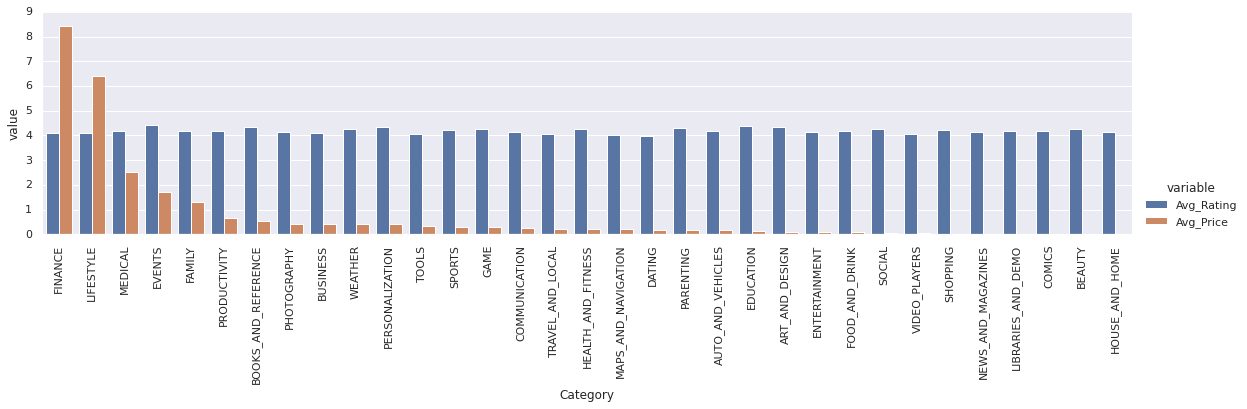

In [518]:
tidy_data = category_details.melt(id_vars='Category')
plot = sns.catplot(x='Category', y='value', data=tidy_data, hue='variable', kind='bar', height=4, aspect=4)

plot.set_xticklabels(rotation='vertical')

The average rating across all categories is relatively similar, with an average rating greater than approximately 4. However it can be seen that specific categories are more likely to be paid rather than free. Finance apps have the highest average price at $8.40, followed by lifestyle and medical with average prices of $6.40, and $2.52, respectively. Prior analysis showed that the Family category had the most Paid apps of all the categories and it would appear on average these apps are inexpensive with an average price of $1.31.

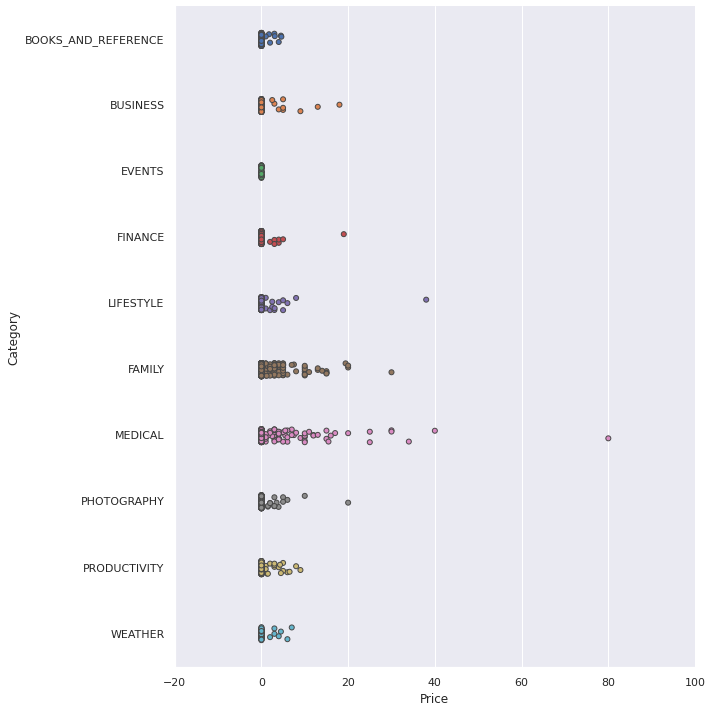

In [519]:
top_paid_categories = list(category_details[:10]['Category'])
paid_categories = apps_rating_price[apps_rating_price.Category.isin(top_paid_categories)]

plot = sns.catplot(x='Price', y='Category', data=paid_categories, kind='strip', jitter=True, height=10, linewidth=1)

Although on average the medical category had the third highest price, this category has the highest price app of $79.99, once the "I am Rich" apps were removed from the dataset. Medical apps also have the largest fluctuation in price with many apps in the range of $0 - $20 and several in the range of $20-40. Analyzing the average price of the categories showed that Finance and Lifestyle had the two highest average prices, however looking and the individual price of each app in the category reveals that this average is likely being influenced by a single expensive app in each category.

### 7.3 Installs of Paid vs Free Apps

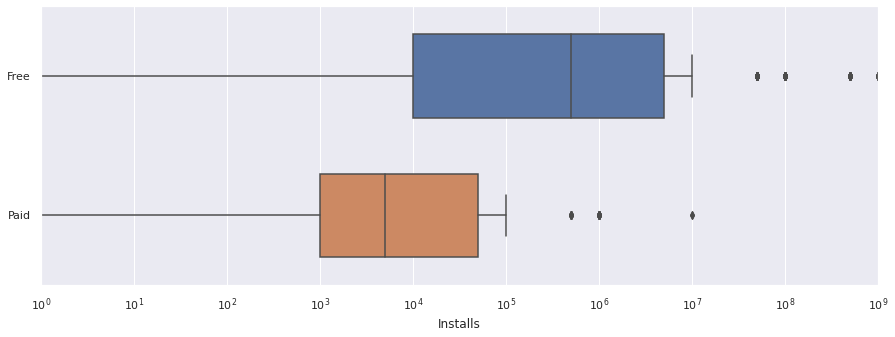

In [520]:

fig, ax = plt.subplots(figsize=(15,5))
ax.set_xscale('log')
 
sns.boxplot(x='Installs', y='Type', data=apps_rating_price, width=0.6)

ax.xaxis.grid(True)
ax.set(ylabel="")
plt.tick_params(axis='x', which='minor')

As the name suggests Free apps are free to download however often either come with advertisements within the app or supplement a paid product, while Paid apps customers pay for once prior to downloading the app. Some paid apps come with a free trial period that allow a customer to try the app prior to purchasing the app, and this may be a helpful strategy because the the number of installs of Paid apps is not to far off from the average download of Free apps which customer are free to download and remove as desired. 

### 7.4 Sentiment Analysis

In [521]:
merged = apps.merge(raw_reviews, left_on='App', right_on='App')
merged.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


#### 7.4.1 Sentiment Polarity

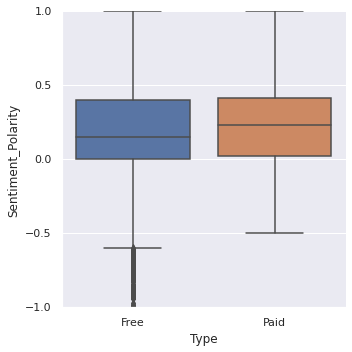

In [522]:
merged = merged.dropna(subset=['Sentiment', 'Review'])
plot = sns.catplot(y='Sentiment_Polarity', x='Type', kind='box', data=merged)

All app reviews have an overall sentiment of Positive, Negative, or Neutral assigned to them. Along with the sentiment each review has a sentiment polarity which ranges from -1 to +1 and the higher the score indicates a more positive sentiment. Comparing the the sentiment polarity of Free vs Paid apps shows that Free apps have a high number of negative polarity scores and negative review compared to Paid apps, while Paid app reviews analyzed were never extremely negative. This is likely due to a difference in quality when comparing a Free app to a Paid app.

###### *May 2022 Release 1.1*